In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load CSVs
customers = pd.read_csv('/content/drive/MyDrive/Imarticus/Customer.csv')
orders = pd.read_csv('/content/drive/MyDrive/Imarticus/orders.csv', parse_dates=['ORD_DATE'])
agents = pd.read_csv('/content/drive/MyDrive/Imarticus/Agents.csv')

In [3]:
customers.head()

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00001,Micheal,New York,New York,USA,2,3000.0,5000.0,2000.0,6000.0,CCCCCCC,A008
1,C00002,Bolt,New York,New York,USA,3,5000.0,7000.0,9000.0,3000.0,DDNRDRH,A008
2,C00003,Martin,Torento,Torento,Canada,2,8000.0,7000.0,7000.0,8000.0,MJYURFD,A004
3,C00004,Winston,Brisban,Brisban,Australia,1,5000.0,8000.0,7000.0,6000.0,AAAAAAA,A005
4,C00005,Sasikant,Mumbai,Mumbai,India,1,7000.0,11000.0,7000.0,11000.0,147-25896312,A002


In [4]:
orders.head()

,ORD_NUM,ORD_AMOUNT,ADVANCE_AMOUNT,ORD_DATE,CUST_CODE,AGENT_CODE,ORD_DESCRIPTION
0,200100,1000.0,600.0,2008-01-08,C00013,A003,SOD
1,200101,3000.0,1000.0,2008-08-21,C00001,A008,SOD
2,200102,2000.0,300.0,2008-06-12,C00012,A012,SOD
3,200103,1500.0,700.0,2008-10-10,C00021,A005,SOD
4,200104,1500.0,500.0,2009-03-21,C00006,A004,SOD


In [5]:
agents.head()

,AGENT_CODE,AGENT_NAME,WORKING_AREA,COMMISSION,PHONE_NO,COUNTRY
0,A001,Subbarao,Bangalore,0.14,077-12346674,NaN
1,A002,Mukesh,Mumbai,0.11,029-12358964,NaN
2,A003,Alex,London,0.13,075-12458969,NaN
3,A004,Ivan,Torento,0.15,008-22544166,NaN
4,A005,Anderson,Brisban,0.13,045-21447739,NaN


In [6]:
# Clean column names
customers.columns = customers.columns.str.strip()
orders.columns = orders.columns.str.strip()
agents.columns = agents.columns.str.strip()

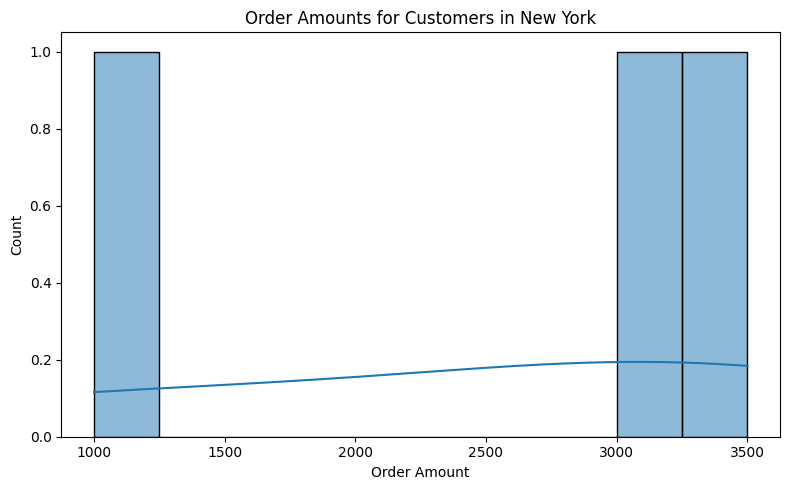

In [8]:
# 4. Orders by Customers from New York
ny_orders = orders.merge(customers, on='CUST_CODE')
ny_orders = ny_orders[ny_orders['CUST_CITY'] == 'New York']
plt.figure(figsize=(8,5))
sns.histplot(ny_orders['ORD_AMOUNT'], bins=10, kde=True)
plt.title("Order Amounts for Customers in New York")
plt.xlabel("Order Amount")
plt.tight_layout()
plt.show()

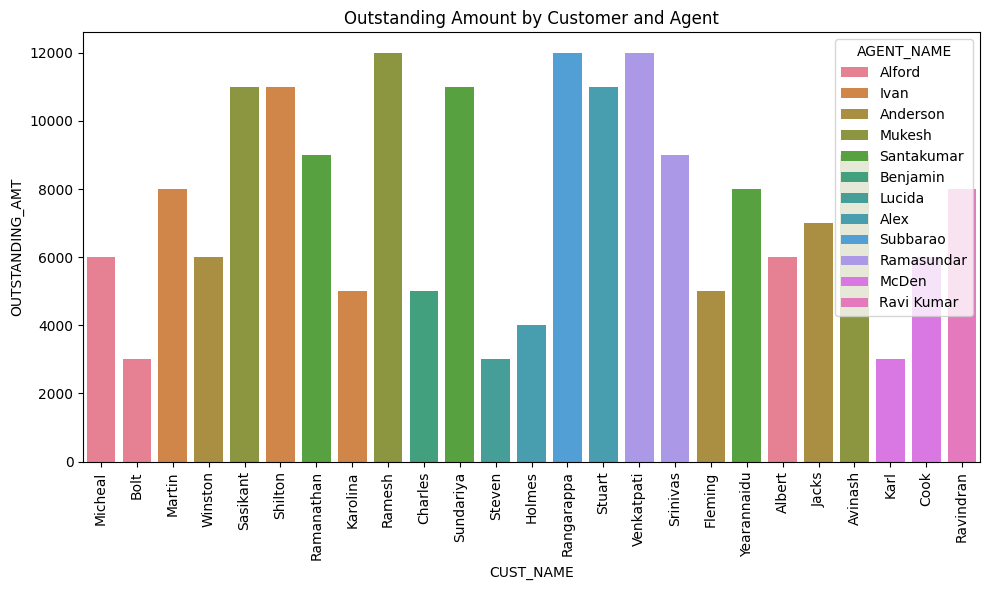

In [9]:
#1
merged_df = customers.merge(agents, on='AGENT_CODE')
plt.figure(figsize=(10,6))
sns.barplot(x='CUST_NAME', y='OUTSTANDING_AMT', hue='AGENT_NAME', data=merged_df)
plt.xticks(rotation=90)
plt.title("Outstanding Amount by Customer and Agent")
plt.tight_layout()
plt.show()

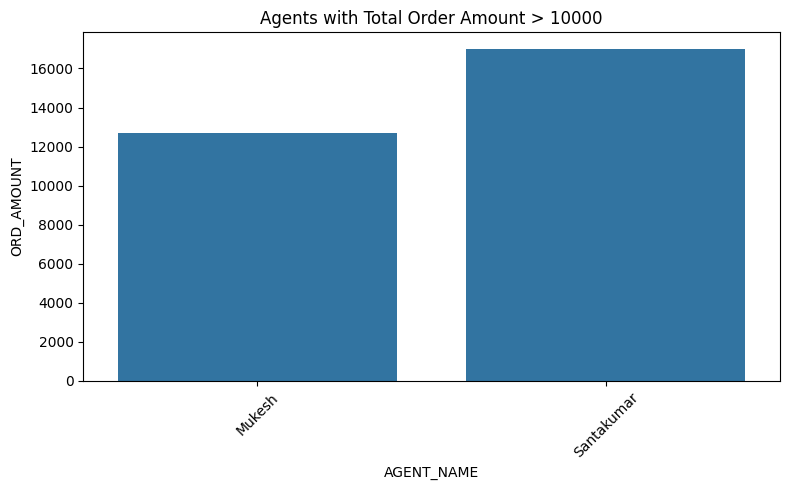

In [10]:
#2
agent_order_sum = orders.merge(agents, on='AGENT_CODE')
grouped = agent_order_sum.groupby(['AGENT_CODE', 'AGENT_NAME'])['ORD_AMOUNT'].sum().reset_index()
filtered = grouped[grouped['ORD_AMOUNT'] > 10000]

plt.figure(figsize=(8,5))
sns.barplot(data=filtered, x='AGENT_NAME', y='ORD_AMOUNT')
plt.title("Agents with Total Order Amount > 10000")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Rename AGENT_CODE_x to AGENT_CODE to use for the next merge
oc = oc.rename(columns={'AGENT_CODE_x': 'AGENT_CODE'})

# Drop the duplicate one from customers to avoid confusion
oc = oc.drop(columns=['AGENT_CODE_y'])

# Now merge with agents
view = oc.merge(agents, on='AGENT_CODE')

# Display
print(view[['ORD_NUM', 'ORD_DATE', 'CUST_NAME', 'AGENT_NAME']].head())


   ORD_NUM   ORD_DATE CUST_NAME AGENT_NAME
0   200100 2008-01-08    Holmes       Alex
1   200101 2008-08-21   Micheal     Alford
2   200102 2008-06-12    Steven     Lucida
3   200103 2008-10-10     Jacks   Anderson
4   200104 2009-03-21   Shilton       Ivan


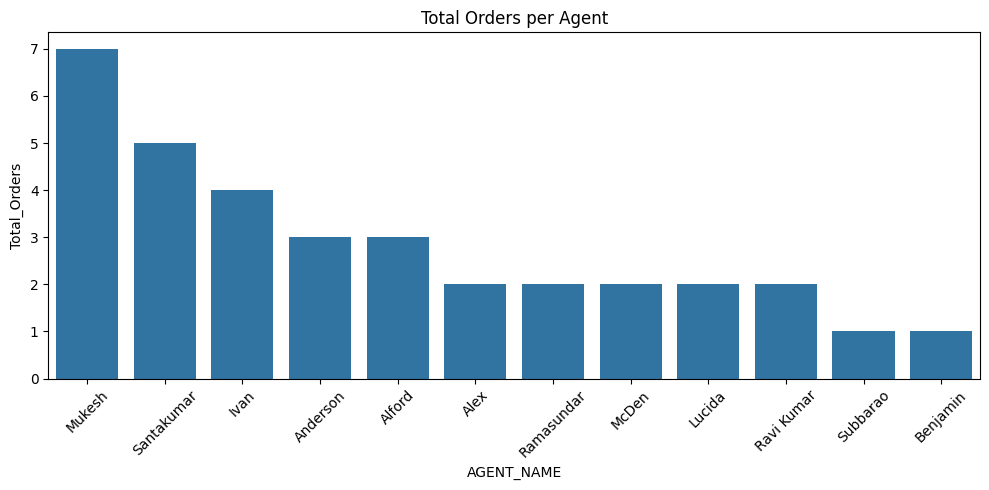

In [17]:

# 5. Total Orders per Agent
order_counts = agents.merge(orders, on='AGENT_CODE', how='left')
counts = order_counts.groupby(['AGENT_CODE', 'AGENT_NAME'])['ORD_NUM'].count().reset_index(name='Total_Orders')
plt.figure(figsize=(10,5))
sns.barplot(x='AGENT_NAME', y='Total_Orders', data=counts.sort_values('Total_Orders', ascending=False))
plt.xticks(rotation=45)
plt.title("Total Orders per Agent")
plt.tight_layout()
plt.show()

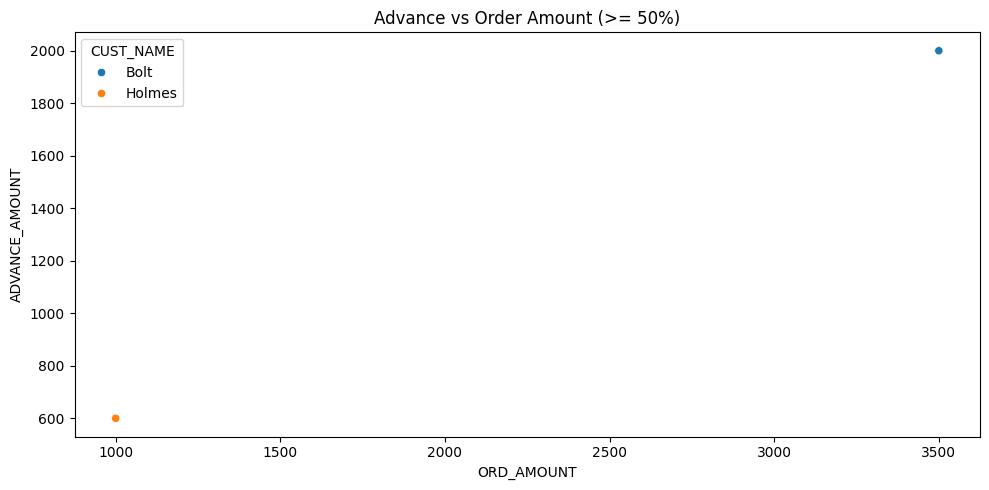

In [18]:
# 6. Orders where Advance ≥ 50% of Order Amount
merged = customers.merge(orders, on='CUST_CODE')
filtered = merged[merged['ADVANCE_AMOUNT'] >= 0.5 * merged['ORD_AMOUNT']]
plt.figure(figsize=(10,5))
sns.scatterplot(data=filtered, x='ORD_AMOUNT', y='ADVANCE_AMOUNT', hue='CUST_NAME')
plt.title("Advance vs Order Amount (>= 50%)")
plt.tight_layout()
plt.show()

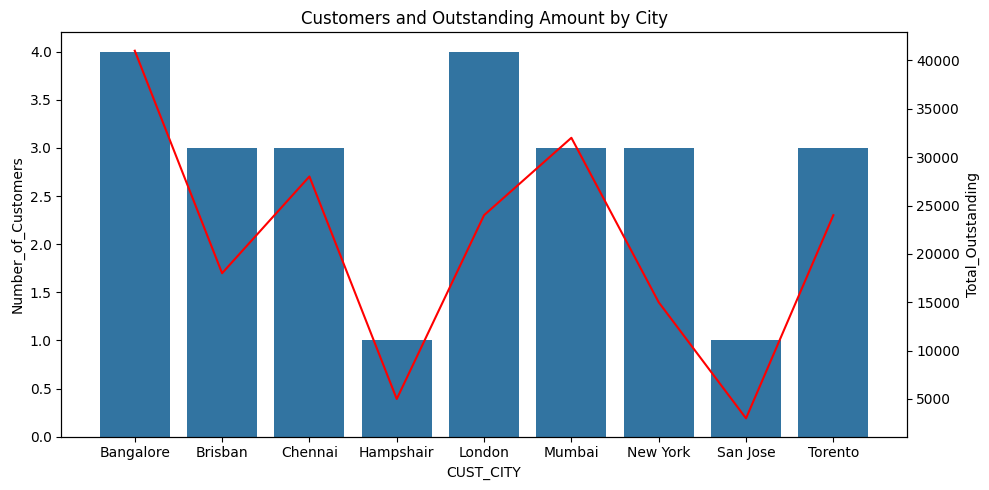

In [19]:
# 7. Number of Customers & Total Outstanding by City
grouped = customers.groupby('CUST_CITY').agg({'CUST_CODE':'count', 'OUTSTANDING_AMT':'sum'}).reset_index()
grouped.columns = ['CUST_CITY', 'Number_of_Customers', 'Total_Outstanding']
fig, ax1 = plt.subplots(figsize=(10,5))
sns.barplot(x='CUST_CITY', y='Number_of_Customers', data=grouped, ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(x='CUST_CITY', y='Total_Outstanding', data=grouped, ax=ax2, color='red')
ax1.set_title("Customers and Outstanding Amount by City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

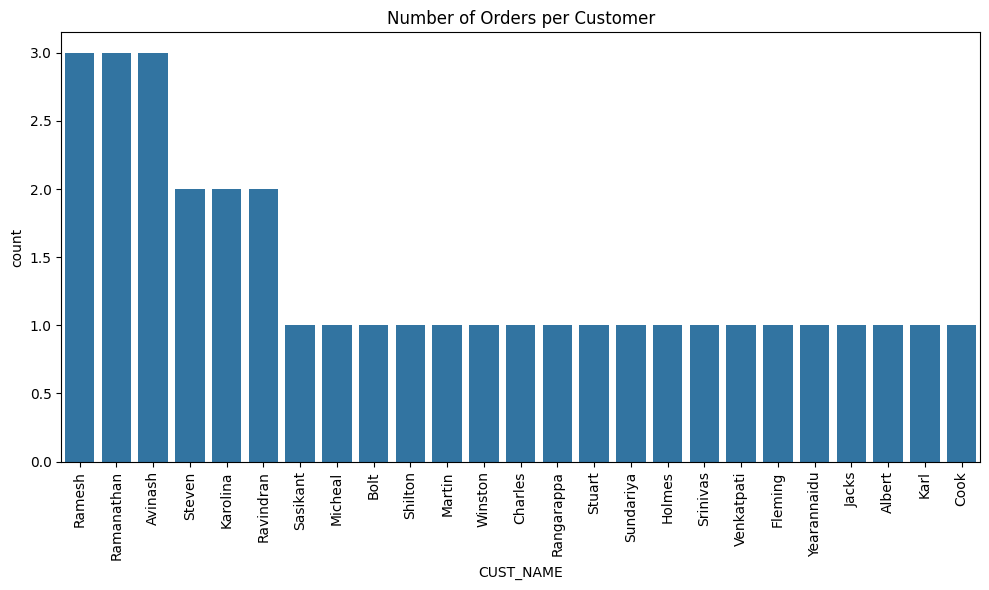

In [20]:
# 8. Customers and Their Orders
merged = customers.merge(orders, on='CUST_CODE', how='left')
plt.figure(figsize=(10,6))
sns.countplot(data=merged, x='CUST_NAME', order=merged['CUST_NAME'].value_counts().index)
plt.title("Number of Orders per Customer")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

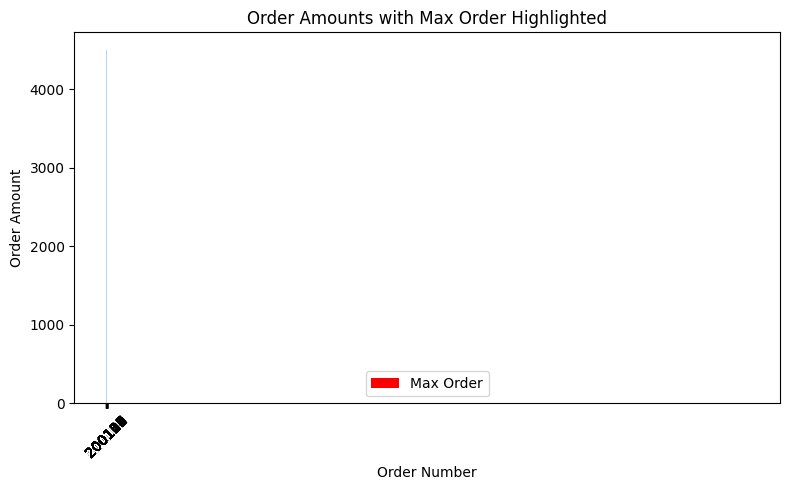

In [23]:
#9
max_amt = orders['ORD_AMOUNT'].max()
max_order = orders[orders['ORD_AMOUNT'] == max_amt]

# Plot bar chart with highlight
plt.figure(figsize=(8, 5))
sns.barplot(data=orders, x='ORD_NUM', y='ORD_AMOUNT', color='lightblue')

# Highlight the max order in red
plt.bar(max_order['ORD_NUM'], max_order['ORD_AMOUNT'], color='red', label='Max Order')

# Labels and legend
plt.title("Order Amounts with Max Order Highlighted")
plt.xlabel("Order Number")
plt.ylabel("Order Amount")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

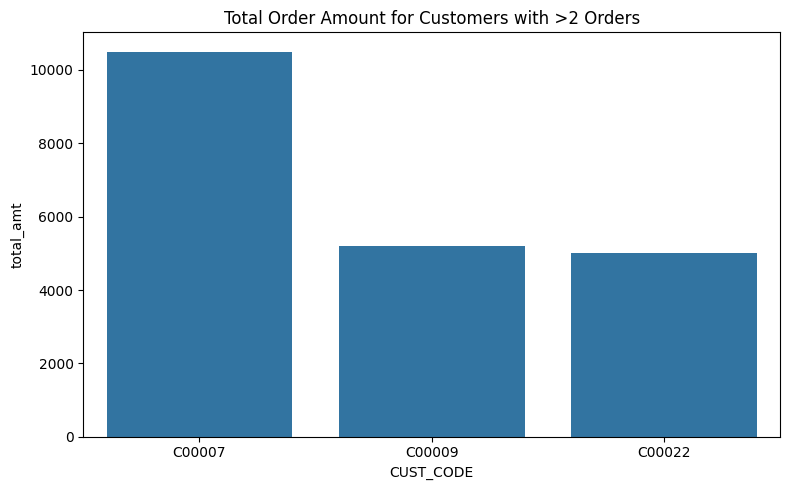

In [25]:
# 10. Customers with >2 Orders & Total Amount
order_counts = orders.groupby('CUST_CODE').agg(order_count=('ORD_NUM','count'), total_amt=('ORD_AMOUNT','sum')).reset_index()
filtered = order_counts[order_counts['order_count'] > 2]
plt.figure(figsize=(8,5))
sns.barplot(data=filtered, x='CUST_CODE', y='total_amt')
plt.title("Total Order Amount for Customers with >2 Orders")
plt.tight_layout()
plt.show()

<ipython-input-26-34e12e2b9ba2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_orders, x='Day', y='Total_Order_Amount', palette='Blues_d')


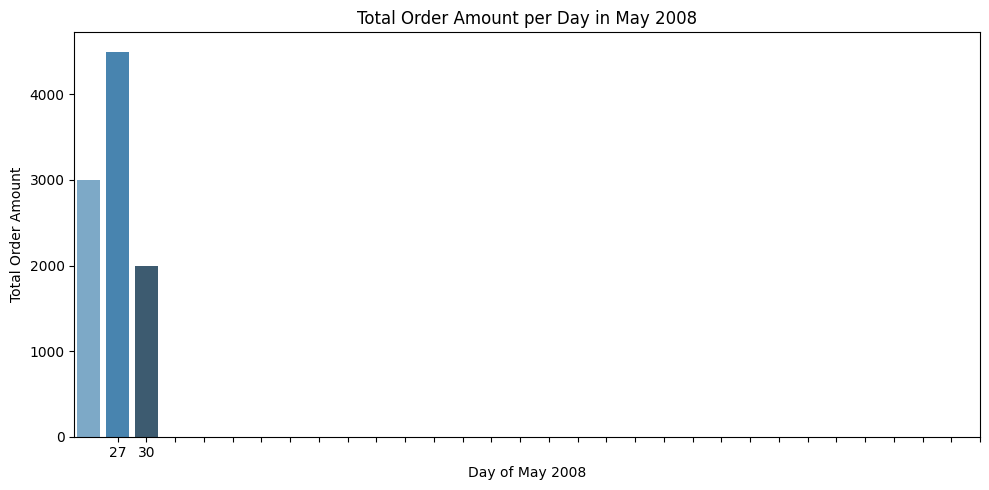

In [26]:
#11
# Filter orders from May 2008
orders_in_may = orders[(orders['ORD_DATE'].dt.month == 5) & (orders['ORD_DATE'].dt.year == 2008)]

# Group by day and sum the order amounts
daily_orders = orders_in_may.groupby(orders_in_may['ORD_DATE'].dt.day)['ORD_AMOUNT'].sum().reset_index()
daily_orders.columns = ['Day', 'Total_Order_Amount']

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=daily_orders, x='Day', y='Total_Order_Amount', palette='Blues_d')

plt.title("Total Order Amount per Day in May 2008")
plt.xlabel("Day of May 2008")
plt.ylabel("Total Order Amount")
plt.xticks(range(1, 32))
plt.tight_layout()
plt.show()

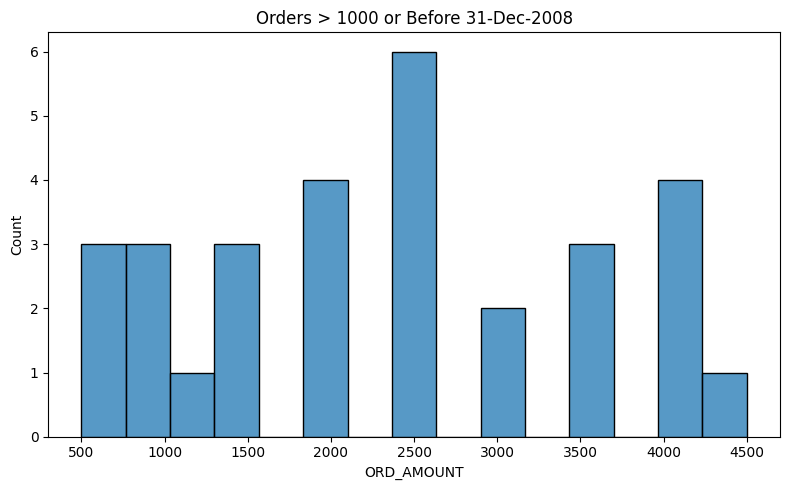

In [27]:
# 12. Orders with Amount >1000 or Date < '2008-12-31'
filtered = orders[(orders['ORD_AMOUNT'] > 1000) | (orders['ORD_DATE'] < '2008-12-31')]
plt.figure(figsize=(8,5))
sns.histplot(filtered['ORD_AMOUNT'], bins=15)
plt.title("Orders > 1000 or Before 31-Dec-2008")
plt.tight_layout()
plt.show()

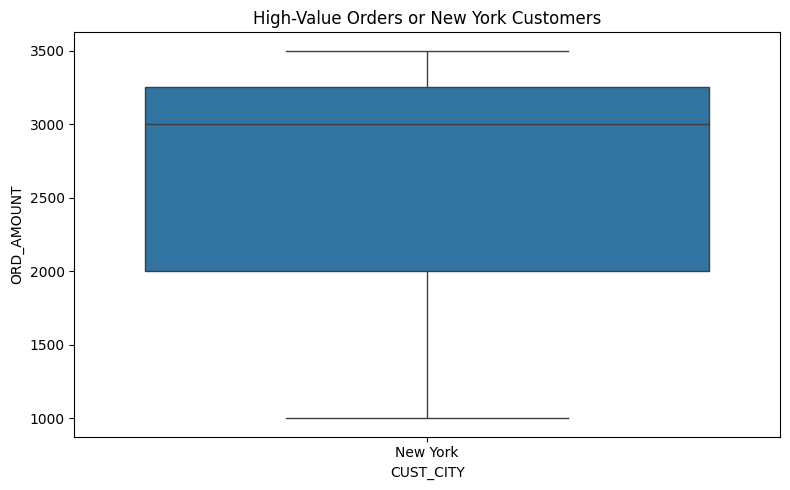

In [28]:
# 13. Orders by New York Customers or Amount > 5000
merged = orders.merge(customers, on='CUST_CODE')
filtered = merged[(merged['CUST_CITY'] == 'New York') | (merged['ORD_AMOUNT'] > 5000)]
plt.figure(figsize=(8,5))
sns.boxplot(x='CUST_CITY', y='ORD_AMOUNT', data=filtered)
plt.title("High-Value Orders or New York Customers")
plt.tight_layout()
plt.show()

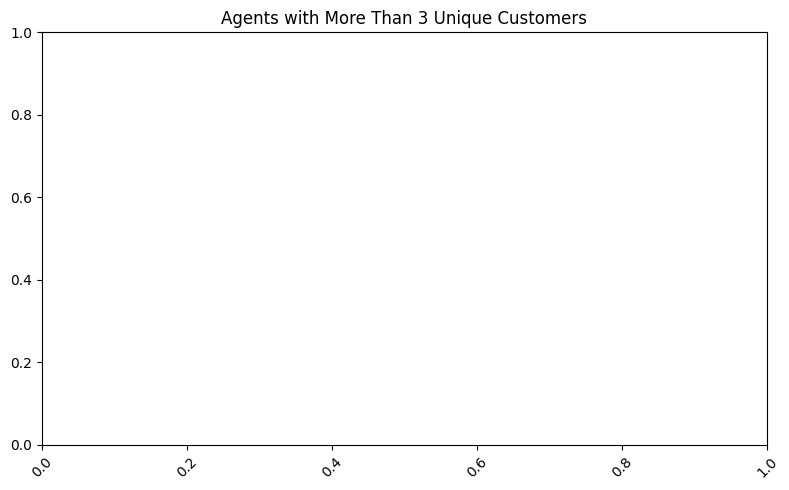

In [29]:
# 14. Agents with More Than 3 Unique Customers
merged = agents.merge(orders, on='AGENT_CODE')
unique_customers = merged.groupby(['AGENT_CODE', 'AGENT_NAME'])['CUST_CODE'].nunique().reset_index(name='Total_Customers')
filtered = unique_customers[unique_customers['Total_Customers'] > 3]
plt.figure(figsize=(8,5))
sns.barplot(data=filtered, x='AGENT_NAME', y='Total_Customers')
plt.title("Agents with More Than 3 Unique Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

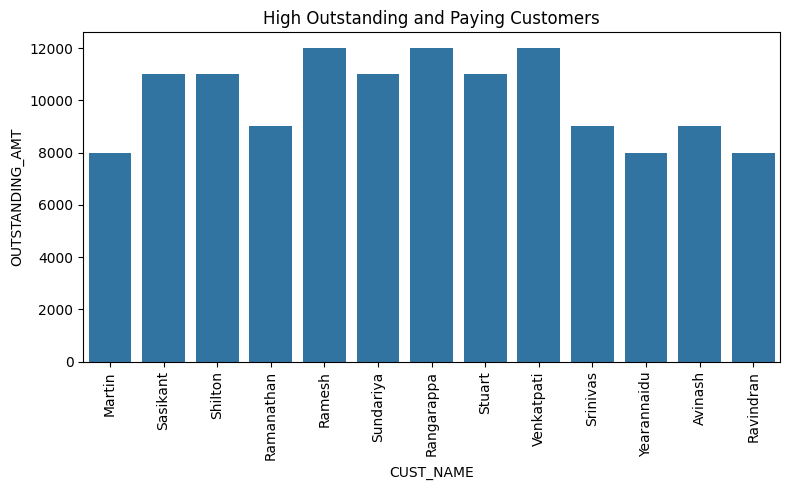

In [30]:
# 15. Customers with Payment > 0 and Outstanding > 7000
filtered = customers[(customers['PAYMENT_AMT'] > 0) & (customers['OUTSTANDING_AMT'] > 7000)]
plt.figure(figsize=(8,5))
sns.barplot(data=filtered, x='CUST_NAME', y='OUTSTANDING_AMT')
plt.title("High Outstanding and Paying Customers")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()